In [38]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
nltk.download('punkt') #tokenizing text into sentence/words
nltk.download('wordnet')  #It is used for various NLP tasks such as lemmatization
from nltk.tokenize import word_tokenize #tokenizing a text into individual words.
from nltk.stem import WordNetLemmatizer #break word down to its root meaning to identify similarities
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [39]:
tweet_df = pd.read_csv('Twitter_train.csv')

In [40]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [41]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [42]:
# printing random tweets 
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



## Data Processing 

In [43]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'ð', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [44]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [45]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [46]:
# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

In [47]:
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return tweet

In [48]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(word_tokenize(x)))

In [49]:
# printing the data to see the effect of preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run'] 

['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'van', 'pdx', 'disapointed', 'getthanked'] 

['bihday', 'majesty'] 

['model', 'love', 'u', 'take', 'u', 'time', 'ur'] 

['factsguide', 'society', 'motivation'] 



In [50]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28424 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28424 non-null  int64 
 1   label   28424 non-null  int64 
 2   tweet   28424 non-null  object
dtypes: int64(2), object(1)
memory usage: 888.2+ KB


In [51]:
tweet_df['label'].value_counts()

label
0    26559
1     1865
Name: count, dtype: int64

In [52]:
tweet_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Data visualization 

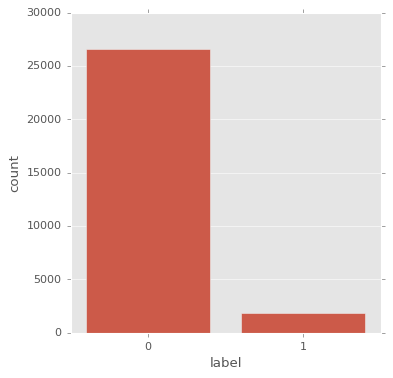

In [53]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)
plt.show()

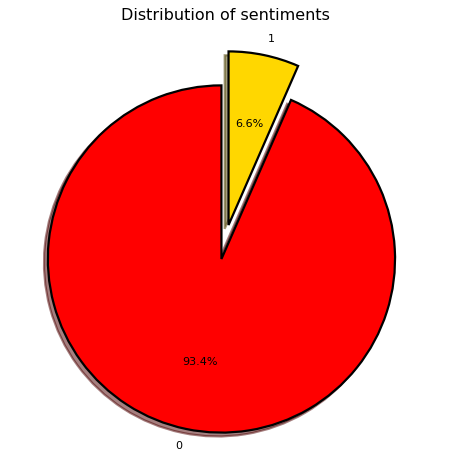

In [54]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

In [55]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, ur]"
4,5,0,"[factsguide, society, motivation]"


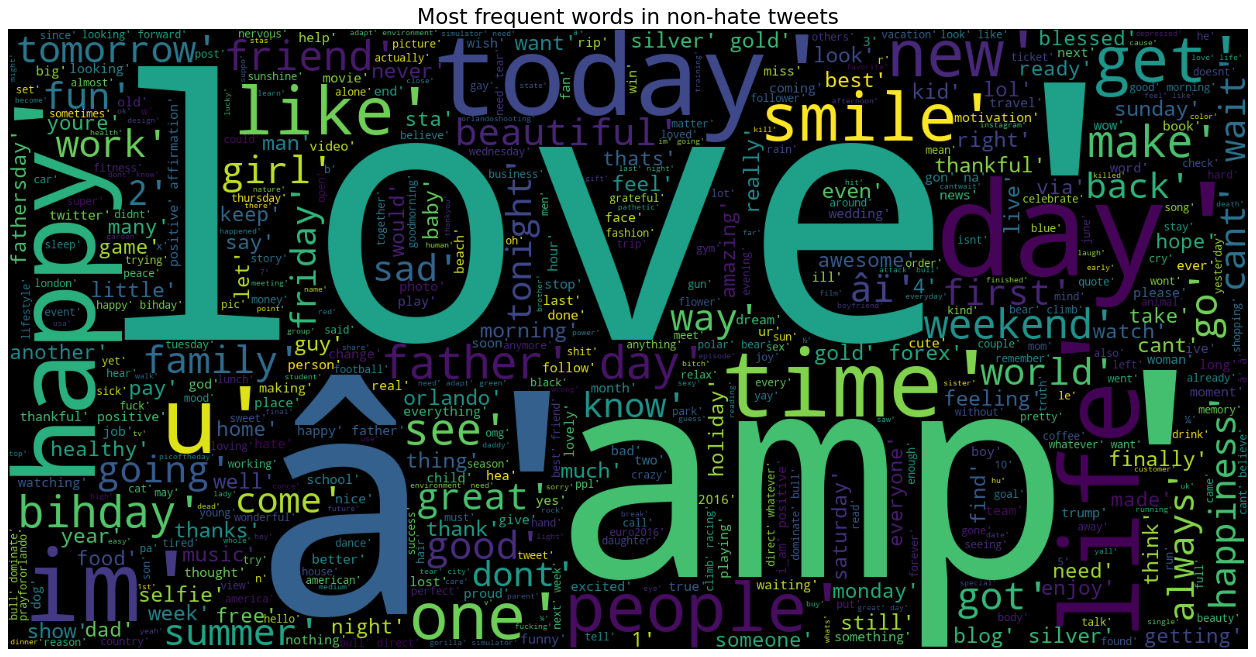

In [56]:
text = ' '.join([str(word) for word in non_hate_tweets['tweet']])

# Rest of your code remains the same
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non-hate tweets', fontsize=19)
plt.show()

In [57]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,label,tweet
13,14,1,"[cnn, call, michigan, middle, school, build, w..."
14,15,1,"[comment, australia, opkillingbay, seashepherd..."
17,18,1,"[retweet, agree]"
23,24,1,"[lumpy, say, prove, lumpy]"
34,35,1,"[unbelievable, 21st, century, wed, need, somet..."


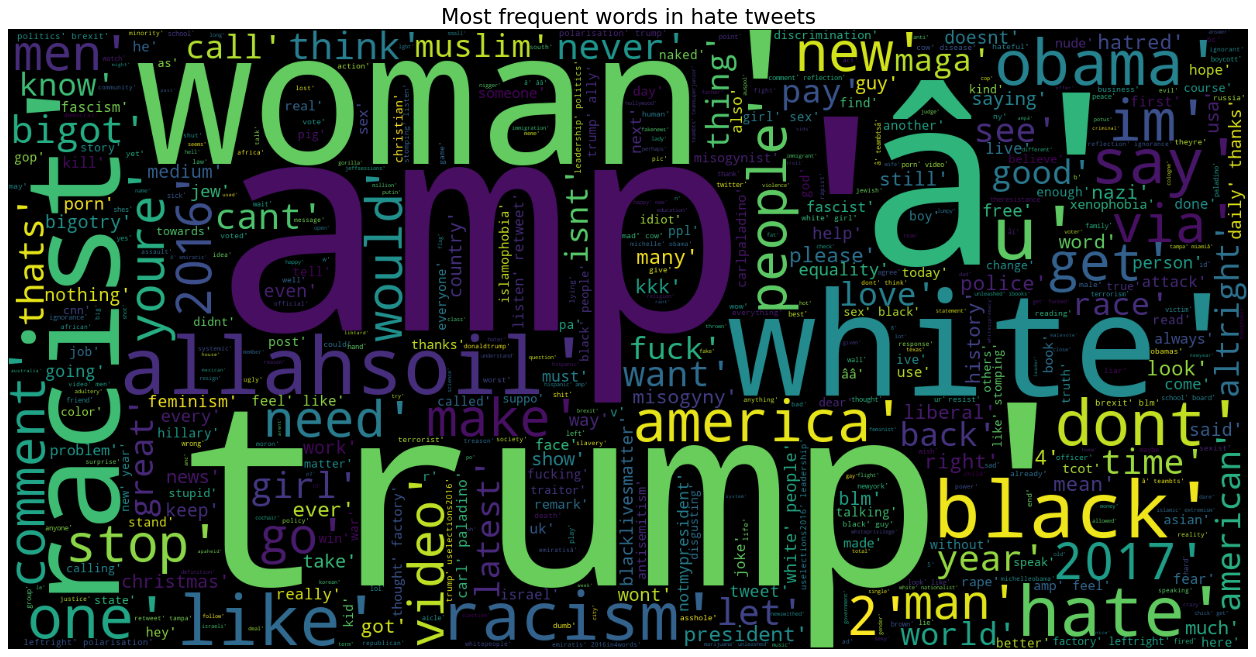

In [58]:
text = ' '.join([str(word) for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [ ]:
## Feature engineering

In [59]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit([' '.join(tweet) for tweet in tweet_df['tweet']]) #For unigram and bigram

In [60]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 199227

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [61]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit([' '.join(tweet) for tweet in tweet_df['tweet']])

In [62]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 357592

First 20 features: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


## Model Building

In [63]:
X = tweet_df['tweet'].apply(lambda tweet: ' '.join(tweet))
Y = tweet_df['label']
X = vect.transform(X) 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (22739, 357592)
Size of y_train: (22739,)
Size of x_test:  (5685, 357592)
Size of y_test:  (5685,)


In [66]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 93.54%


In [67]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[5300    1]
 [ 366   18]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5301
           1       0.95      0.05      0.09       384

    accuracy                           0.94      5685
   macro avg       0.94      0.52      0.53      5685
weighted avg       0.94      0.94      0.91      5685



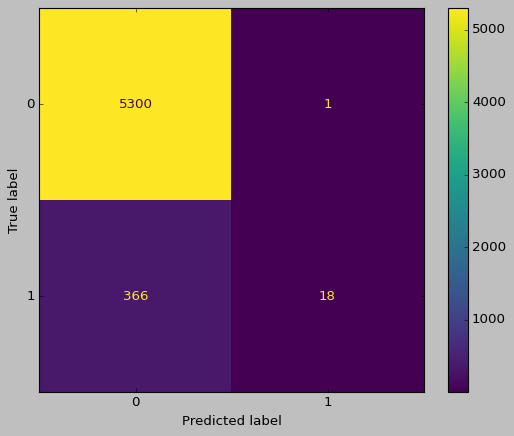

In [68]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

## Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [70]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.95
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [71]:
y_pred = grid.predict(x_test)

In [72]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.90%


In [73]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5295    6]
 [ 284  100]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5301
           1       0.94      0.26      0.41       384

    accuracy                           0.95      5685
   macro avg       0.95      0.63      0.69      5685
weighted avg       0.95      0.95      0.94      5685

